### SGD
$$
    \mathbf{W} \gets \mathbf{W}-\eta\frac{\partial L}{\partial \mathbf {W}}
$$

In [1]:
# SGD
class SGD:
    def __init__(self, lr = 0.01):
        self.lr = lr
        
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

### disadvantages of SGD
$$
f(x,y)=\frac{1}{20}x^2+y^2
$$
![](../img/SGD.png)
<center>函数图像（左）和等高线（右）</center>

![](../img/SGDgra.png)
<center>梯度</center>

SGD的缺点是，如果函数的**形状非均向**（anisotropic），比如呈延伸状，搜索的路径就会非常低效。
![](../img/path.png)
<center>基于SGD的最优化的更新路径</center>

In [2]:
# from matplotlib.pylab import plt
# from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [3]:
# fig = plt.figure()
# ax = fig.gca(projection='3d')
# plt.xlabel('x')
# plt.ylabel('y')
# x = np.arange(-10, 10, 0.1)
# y = np.arange(-10, 10, 0.1)
# X, Y = np.meshgrid(x, y)
# z = np.add(np.power(X, 2)/20, np.power(Y, 2))
# surf = ax.plot_surface(X, Y, z)
# plt.show()

### Momentum
$$
   \pmb{v}\gets \alpha \pmb{v}-\eta\frac{\partial{L}}{\partial{\pmb{W}}}
   $$
   $$
   \pmb{W}\gets\pmb{W}+\pmb{v}
$$
![](../img/动量.png)


In [4]:
class Momentum:
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None: # first call
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.v[key] = self.momentum*self.v[key] - self.lr*grads[key]
            params[key] += self.v[key]

### AdaGrad
$$
   \pmb{h}\gets \pmb{h}+\frac{\partial{L}}{\partial{\pmb{W}}}\odot\frac{\partial{L}}{\partial{\pmb{W}}}
   $$
   $$
   \pmb{W}\gets\pmb{W}-\frac{1}{\sqrt{h}}\frac{\partial L}{\partial \pmb{W}}
$$

In [5]:
class AdaGrad:
    def __init__(self, lr = 0.01):
        self.lr = lr
        self.h = None
        
    def update(self, params, grads):
        if self.h in None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.h[key] += grad[key]*grad[key]
            params[key] -= self.lr*grads[key]/(np.sqrt(self.h[key])+1e-7)
            

In [6]:
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.random.randn(1000, 100) # randn(size, range)
node_num = 100
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]  
        
    w = np.random.randn(node_num, node_num) * 1
    z = np.dot(x, w)
    a = sigmoid(z)
    activations[i] = a

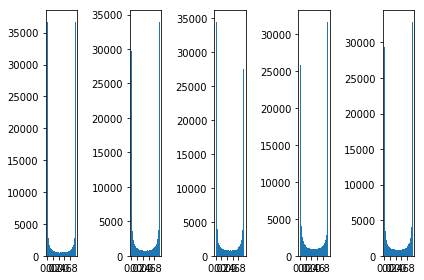

In [7]:
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.xticks(np.arange(0,1,0.2))
    plt.hist(a.flatten(), 30, range=(0, 1), rwidth = 1)
    plt.tight_layout()  
    
plt.show()

sigmoid激活函数使各层的激活值偏向0和1的分布。

偏向0 和1 的数据分布会造成反向传播中梯度的值不断变小，最后消失。这个问题称为梯度消失（gradient vanishing）。

In [8]:
x = np.random.randn(1000, 100) # randn(size, range)
node_num = 100
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]  
        
    w = np.random.randn(node_num, node_num) * 0.01
    z = np.dot(x, w)
    a = sigmoid(z)
    activations[i] = a

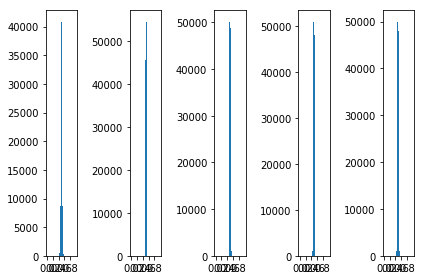

In [9]:
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.xticks(np.arange(0,1,0.2))
    plt.hist(a.flatten(), 30, range=(0, 1), rwidth = 1)
 
plt.tight_layout()     
plt.show()

当权重使用标准差位0.01的高斯分布时，各层的激活值呈集中在0.5 附近的分布。

如果有多个神经元都输出几乎相同的值，那它们就没有存在的意义了。比如，如果100 个神经元都输出几乎相同的值，那么也可以由1 个神经元来表达基本相同的事情。因此，激活值在分布上有所偏向会出现“表现力受限”的问题。

[Xavier的论文](http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf)为了使各层的激活值呈现出具有相同广度的分布，推导了合适的权重分布：
如果前一层的节点数为n，则初始值使用标准差为$\frac{1}{\sqrt{n}}的高斯分布$
![](../img/init.png)

In [10]:
x = np.random.randn(1000, 100) # randn(size, range)
node_num = 100
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]  
        
    w = np.random.randn(node_num, node_num) / np.sqrt(node_num)
    z = np.dot(x, w)
    a = sigmoid(z)
    activations[i] = a

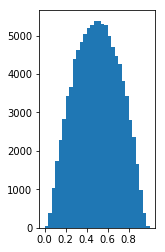

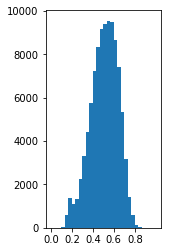

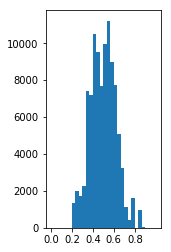

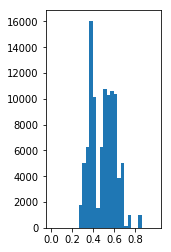

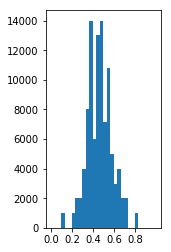

In [11]:
for i, a in activations.items():
    plt.figure(figsize=(12,4))
    plt.subplot(1, len(activations), i+1)
    plt.xticks(np.arange(0,1,0.2))
    plt.hist(a.flatten(), 30, range=(0, 1), rwidth = 1)
    
plt.show()

In [12]:
# tanh的权重分布
def tanh(x):
    x_exp = np.exp(-2*x)
    return (1-x_exp)/(1+x_exp)

x = np.random.randn(1000, 100) # randn(size, range)
node_num = 100
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]  
        
    w = np.random.randn(node_num, node_num) / np.sqrt(node_num)
    z = np.dot(x, w)
    a = tanh(z)
    activations[i] = a

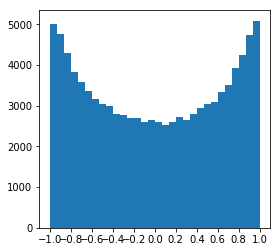

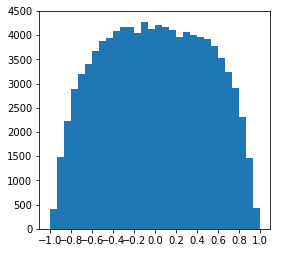

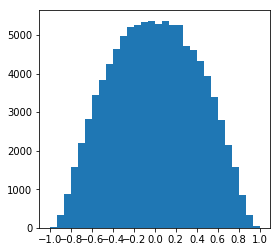

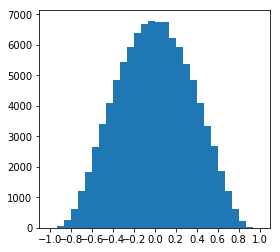

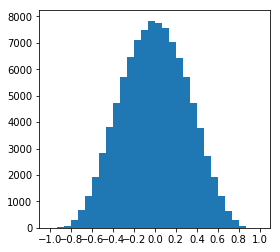

In [13]:
for i, a in activations.items():
    plt.figure(figsize=(24,4))
    plt.subplot(1, len(activations), i+1)
    plt.xticks(np.arange(-1,1.01,0.2))
    plt.hist(a.flatten(), 30, range=(-1, 1), rwidth = 1)
    
plt.show()

### ReLU 权重初始值
[He初始值](https://www.cv-foundation.org/openaccess/content_iccv_2015/papers/He_Delving_Deep_into_ICCV_2015_paper.pdf)：当前一层的节点数为n时，使用标准差为$\sqrt{\frac{2}{n}}$的高斯分布。


In [23]:
def ReLU(x):
    return np.maximum(0, x)

x = np.random.randn(1000, 100) # randn(size, range)
node_num = 100
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]  
        
    w = np.random.randn(node_num, node_num) /np.sqrt(node_num)
    z = np.dot(x, w)
    a = ReLU(z)
    activations[i] = a

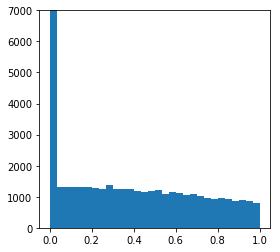

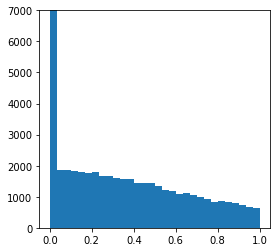

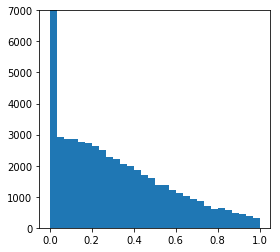

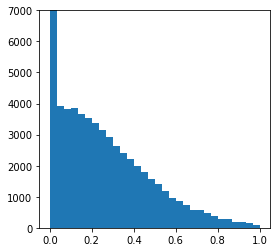

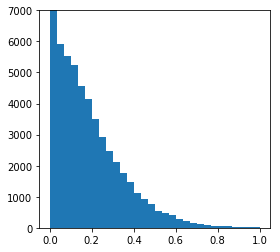

In [25]:
for i, a in activations.items():
    plt.figure(figsize=(24,4))
    plt.subplot(1, len(activations), i+1)
    plt.ylim((0, 7000)) # 注意y轴单位
    plt.xticks(np.arange(0,1.01,0.2))
    plt.hist(a.flatten(), 30, range=(0, 1))
    
plt.show()